In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [552]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
decays = pd.read_csv('models/decays.csv', names=['decays'])
# rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
# rewards_opp = pd.read_csv('rewards_opp.csv', names=['reward'])

In [559]:
metrics.shape, winrates.shape, decays.shape

((3, 7), (1, 3), (8, 1))

In [553]:
decays.tail()

,decays
3,0.999000
4,0.999000
5,0.998002
6,0.997004
7,0.996008


In [560]:
metrics.tail()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
0,0,2,0.353275,0.353275,0.340789,0.340789,0.108276
1,1,2,0.531749,0.531749,0.344191,0.344191,0.136743
2,2,1,0.437668,0.437668,0.330455,0.330455,0.106996


In [561]:
winrates.tail() 

,episode,vs_random,vs_fixed
0,0,100.0,0.0


In [545]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_opp_no_dubs = rewards_opp.drop_duplicates()
rewards_rl.shape, rewards_opp.shape, rewards_rl_no_dubs.shape, rewards_opp_no_dubs.shape

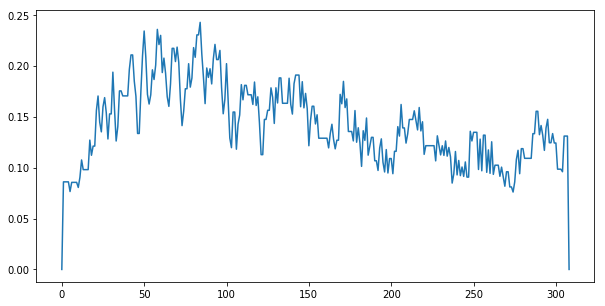

In [547]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp.index, rewards_opp.reward)
plt.show()

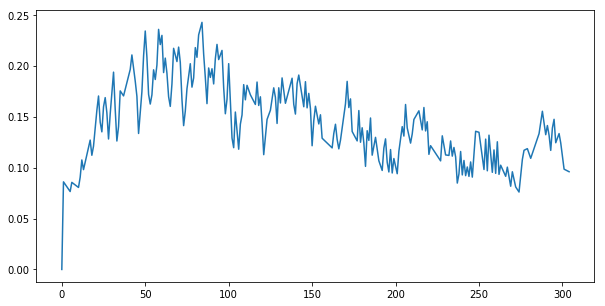

In [548]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp_no_dubs.index, rewards_opp_no_dubs.reward)
plt.show()

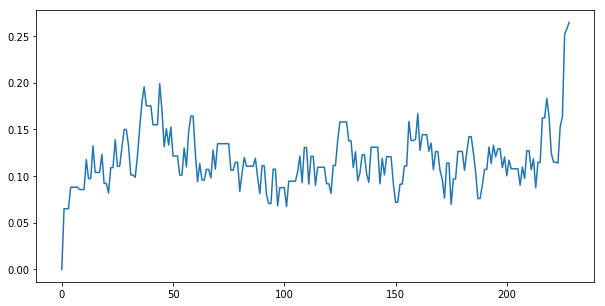

In [549]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

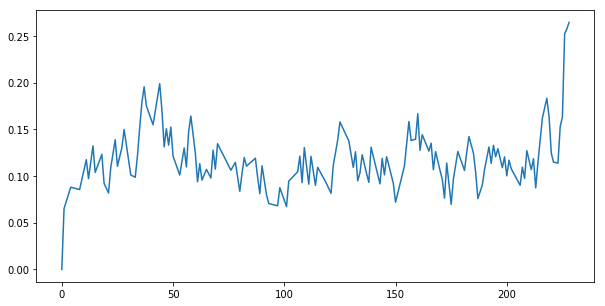

In [550]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

In [556]:
metrics.head()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
0,0,2,0.353275,0.353275,0.340789,0.340789,0.108276
1,1,2,0.531749,0.531749,0.344191,0.344191,0.136743
2,2,1,0.437668,0.437668,0.330455,0.330455,0.106996


In [557]:
winrates.head()

,episode,vs_random,vs_fixed
0,0,100.0,0.0


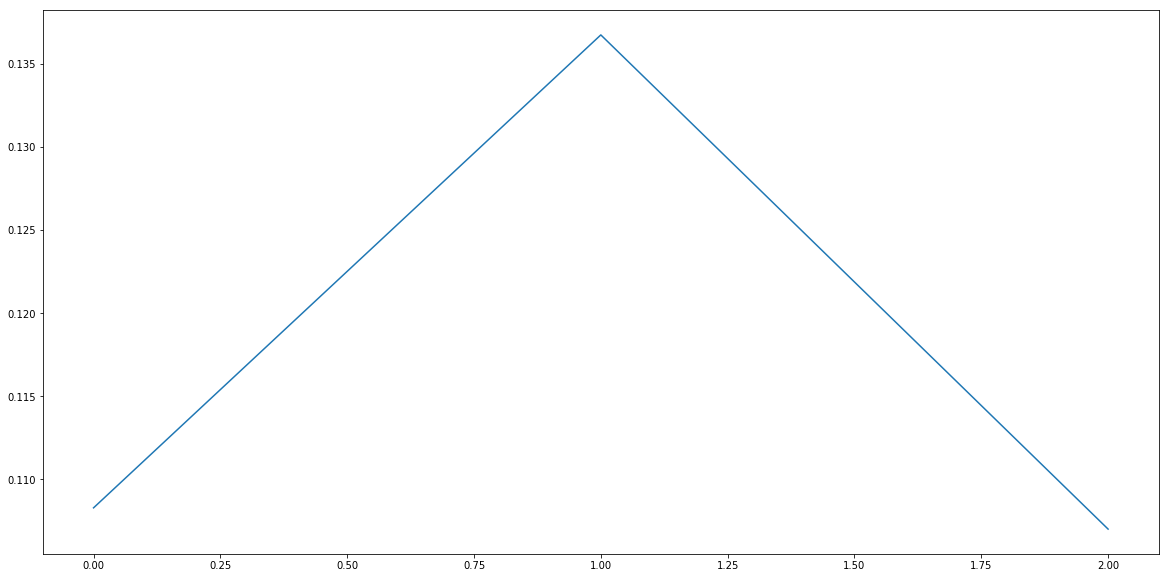

In [558]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.reward_avg)
plt.show()

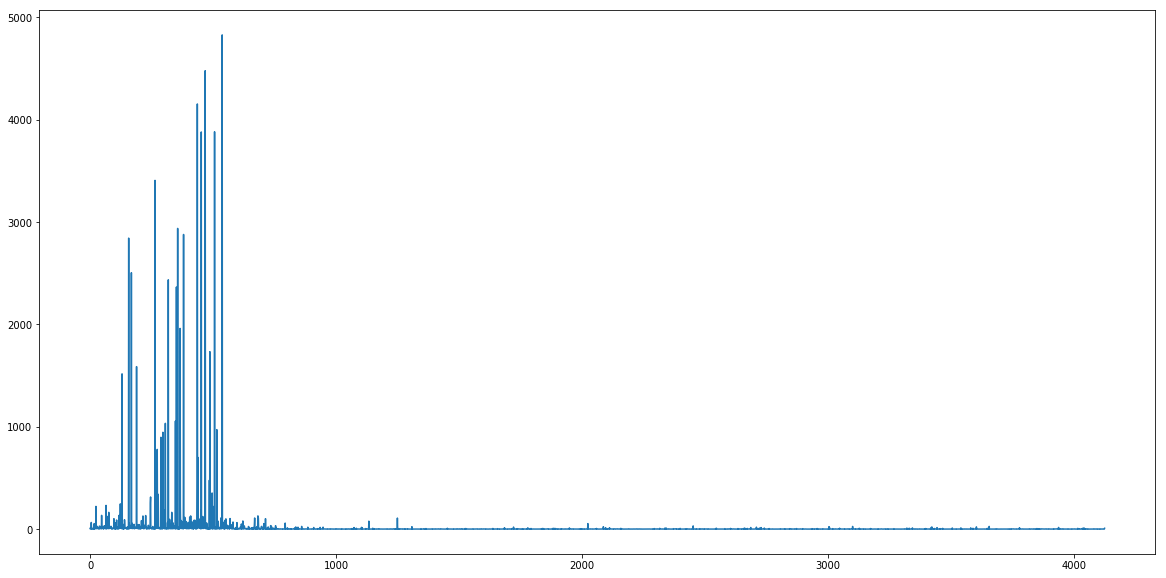

In [526]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

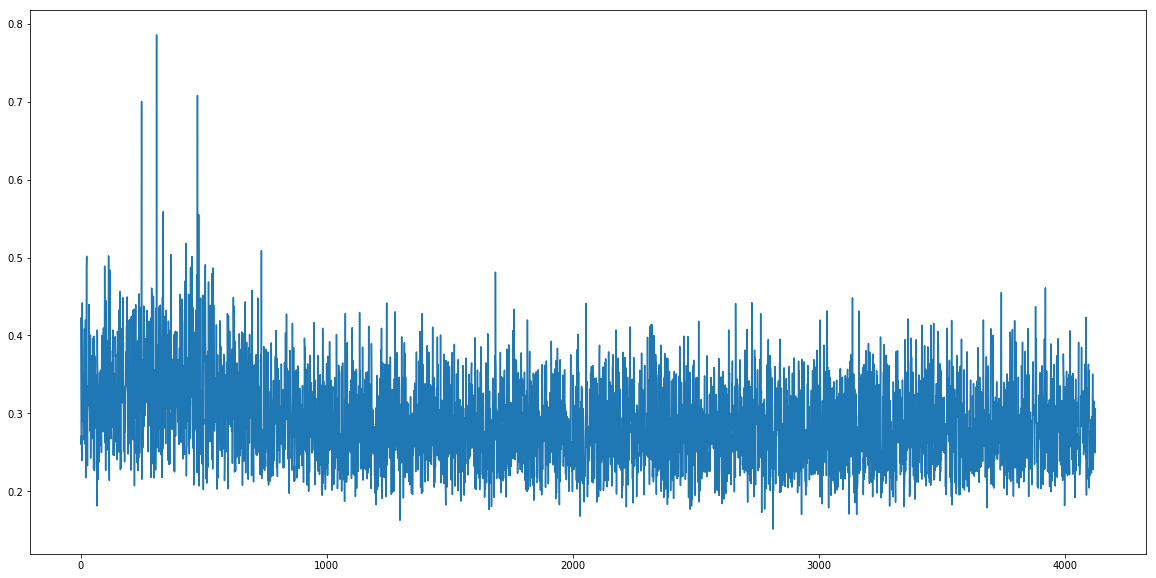

In [527]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

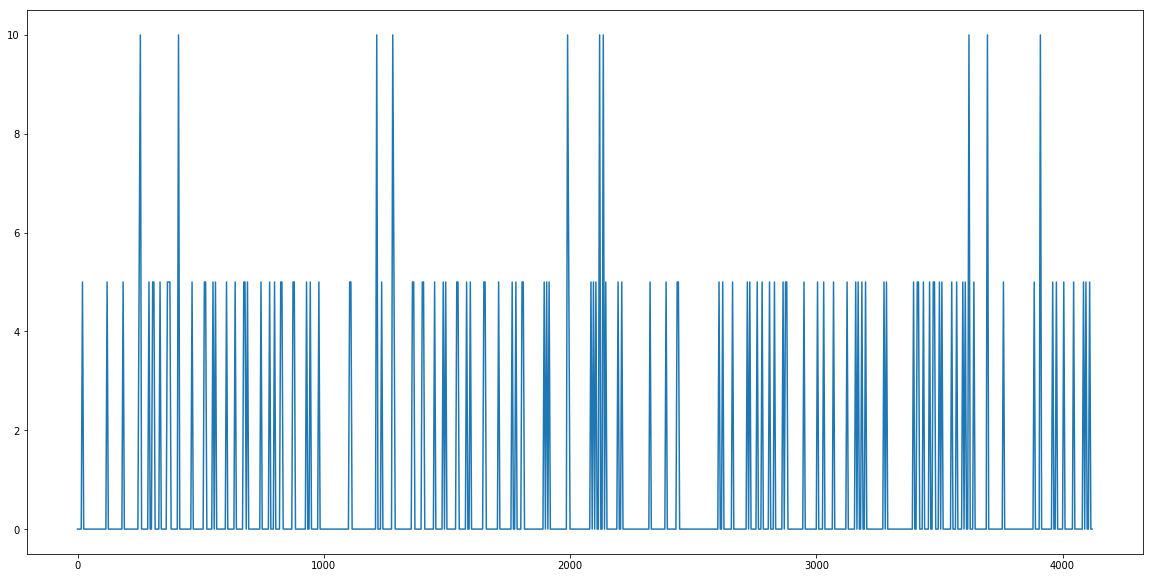

In [530]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_random)
plt.show()

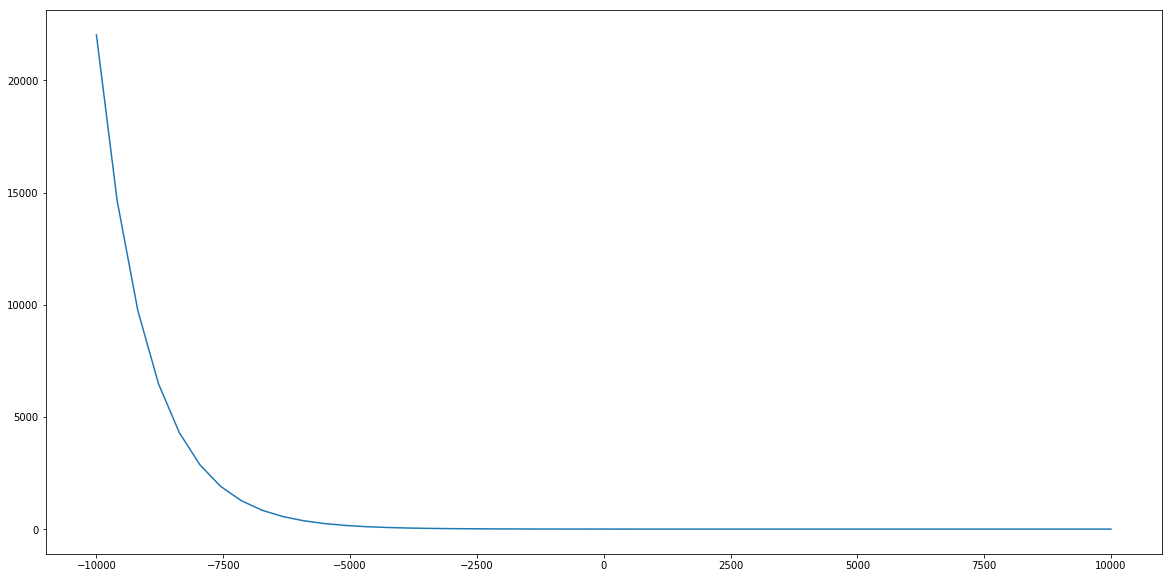

In [84]:
x = np.linspace(-10000, 10000)
y = np.exp(-x * 0.001)
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.show()

In [76]:
np.exp(0)

1.0

In [481]:
np.exp(-150 * 0.01)

0.22313016014842982

In [482]:
import torch
a = torch.tensor([1, 2, 3])

In [483]:
str(a)

'tensor([1, 2, 3])'